In [2]:
import sys

import histomicstk as htk

import numpy as np
import scipy as sp

import skimage.io
import skimage.measure
import skimage.color

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

#Some nice default configuration for plots
plt.rcParams['figure.figsize'] = 20, 20
plt.rcParams['image.cmap'] = 'gray'
titlesize = 24

In [3]:
from nd2reader import ND2Reader
import matplotlib.pyplot as plt

input_image_file = '/home/garner1/Work/dataset/iMS376_20190822_001.nd2' 
plt.figure(figsize=(50, 50))
with ND2Reader(input_image_file) as images:
#   plt.imshow(images[0])
    print(images.metadata)
    print(images.sizes)
    img = images[0]

/home/garner1/.local/lib/python2.7/site-packages/nd2reader/raw_metadata.py:171: UserWarning: Z-levels details missing in metadata. Using Z-coordinates instead.
  warnings.warn("Z-levels details missing in metadata. Using Z-coordinates instead.")


{'num_frames': 1, 'z_coordinates': [1969.0093311291876], 'height': 25951, 'channels': [u'dapi'], 'frames': [0], 'total_images_per_channel': 1, 'date': datetime.datetime(2019, 8, 22, 16, 35, 54), 'pixel_microns': 0.64946534444608, 'z_levels': [0], 'fields_of_view': [0], 'width': 41651, 'experiment': {'loops': [], 'description': 'unknown'}, 'events': []}
{'y': 25951, 'x': 41651, 't': 1}


<Figure size 3600x3600 with 0 Axes>

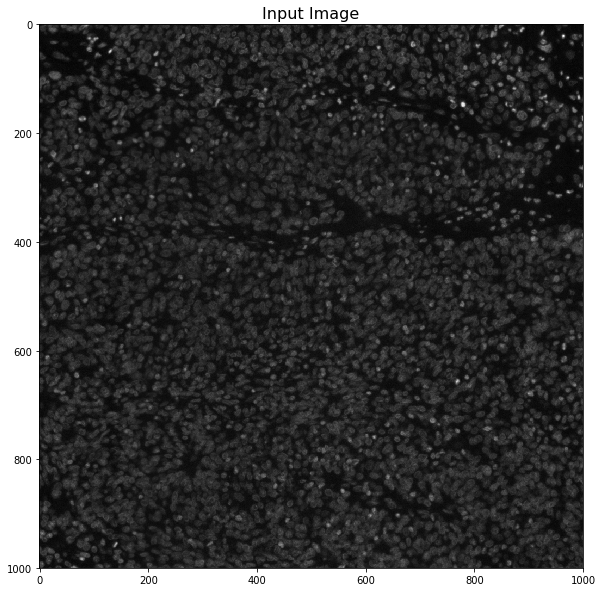

In [4]:
plt.figure(figsize=(20, 10))
plt.imshow(img[10000:11000,10000:11000])
_ = plt.title('Input Image', fontsize=16)

In [5]:
# get nuclei/hematoxylin channel
im_nuclei_stain = img[10000:11000,10000:11000]

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 2.000e+00,
        7.000e+00, 2.000e+00, 6.000e+00, 7.000e+00, 1.100e+01, 2.200e+01,
        3.400e+01, 4.300e+01, 5.400e+01, 8.400e+01, 1.000e+02, 1.160e+02,
        1.570e+02, 1.760e+02, 2.660e+02, 2.880e+02, 3.400e+02, 4.180e+02,
        5.130e+02, 5.770e+02, 7.260e+02, 8.420e+02, 9.730e+02, 1.232e+03,
        1.311e+03, 1.349e+03, 1.619e+03, 1.810e+03, 2.029e+03, 2.273e+03,
        2.398e+03, 2.726e+03, 3.277e+03, 3.210e+03, 3.570e+03, 3.793e+03,
        4.120e+03, 4.491e+03, 4.703e+03, 4.856e+03, 5.217e+03, 6.028e+03,
        5.884e+03, 6.096e+03, 6.318e+03, 6.585e+03, 6.764e+03, 7.028e+03,
        7.160e+03, 8.253e+03, 7.508e+03, 7.469e+03, 7.873e+03, 7.709e+03,
        7.745e+03, 7.809e+03, 7.872e+03, 7.887e+03, 8.486e+03, 7.805e+03,
        7.515e+03, 7.576e+03, 7.299e+03, 7.240e+03, 7.079e+03, 6.979e+03,
        6.982e+03, 7.609e+03, 6.634e+0

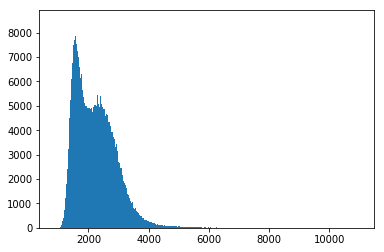

In [6]:
plt.hist(np.ndarray.flatten(im_nuclei_stain),bins = 1000)

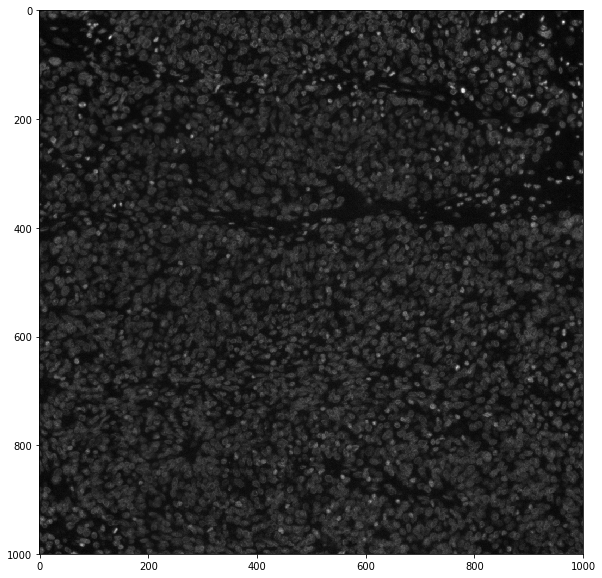

In [10]:
import cv2
normalizedImg = np.zeros(im_nuclei_stain.shape)
normalizedImg = cv2.normalize(im_nuclei_stain,  normalizedImg, 0, 255, cv2.NORM_MINMAX)

plt.figure(figsize=(20, 10))
plt.imshow(normalizedImg)

(array([3.0000e+00, 2.4000e+02, 1.6300e+03, 1.3674e+04, 2.4938e+04,
        6.9740e+04, 6.1278e+04, 8.7425e+04, 4.9431e+04, 6.4596e+04,
        5.9321e+04, 3.8449e+04, 5.8026e+04, 3.9143e+04, 5.9158e+04,
        3.9387e+04, 5.6827e+04, 3.5549e+04, 4.8711e+04, 2.8796e+04,
        3.7457e+04, 3.0184e+04, 1.6268e+04, 1.9404e+04, 1.0129e+04,
        1.1716e+04, 5.9890e+03, 7.1890e+03, 3.6260e+03, 4.2410e+03,
        3.3120e+03, 1.7550e+03, 2.1840e+03, 1.1370e+03, 1.5200e+03,
        8.4200e+02, 1.0880e+03, 5.8200e+02, 7.6000e+02, 4.7800e+02,
        5.8900e+02, 5.0600e+02, 2.8800e+02, 3.3500e+02, 2.2300e+02,
        3.0000e+02, 1.5800e+02, 1.9300e+02, 1.0600e+02, 1.5500e+02,
        1.3800e+02, 8.9000e+01, 9.7000e+01, 5.0000e+01, 7.8000e+01,
        4.6000e+01, 6.9000e+01, 2.4000e+01, 5.6000e+01, 3.2000e+01,
        4.0000e+01, 3.5000e+01, 1.3000e+01, 2.9000e+01, 1.5000e+01,
        2.3000e+01, 8.0000e+00, 1.4000e+01, 7.0000e+00, 1.3000e+01,
        1.0000e+01, 0.0000e+00, 1.0000e+01, 4.00

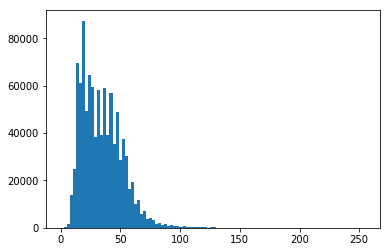

In [13]:
plt.hist(np.ndarray.flatten(normalizedImg),bins = 100)

In [15]:
# segment foreground
foreground_threshold = 60

im_fgnd_mask = sp.ndimage.morphology.binary_fill_holes(normalizedImg < foreground_threshold)

# run adaptive multi-scale LoG filter
min_radius = 2
max_radius = 5

im_log_max, im_sigma_max = htk.filters.shape.cdog(
    normalizedImg, im_fgnd_mask,
    sigma_min=min_radius * np.sqrt(2),
    sigma_max=max_radius * np.sqrt(2)
)

# detect and segment nuclei using local maximum clustering
local_max_search_radius = 5

im_nuclei_seg_mask, seeds, maxima = htk.segmentation.nuclear.max_clustering(
    im_log_max, im_fgnd_mask, local_max_search_radius)

# filter out small objects
min_nucleus_area = 2

im_nuclei_seg_mask = htk.segmentation.label.area_open(
    im_nuclei_seg_mask, min_nucleus_area).astype(np.int)

# compute nuclei properties
objProps = skimage.measure.regionprops(im_nuclei_seg_mask)

Number of nuclei =  3359


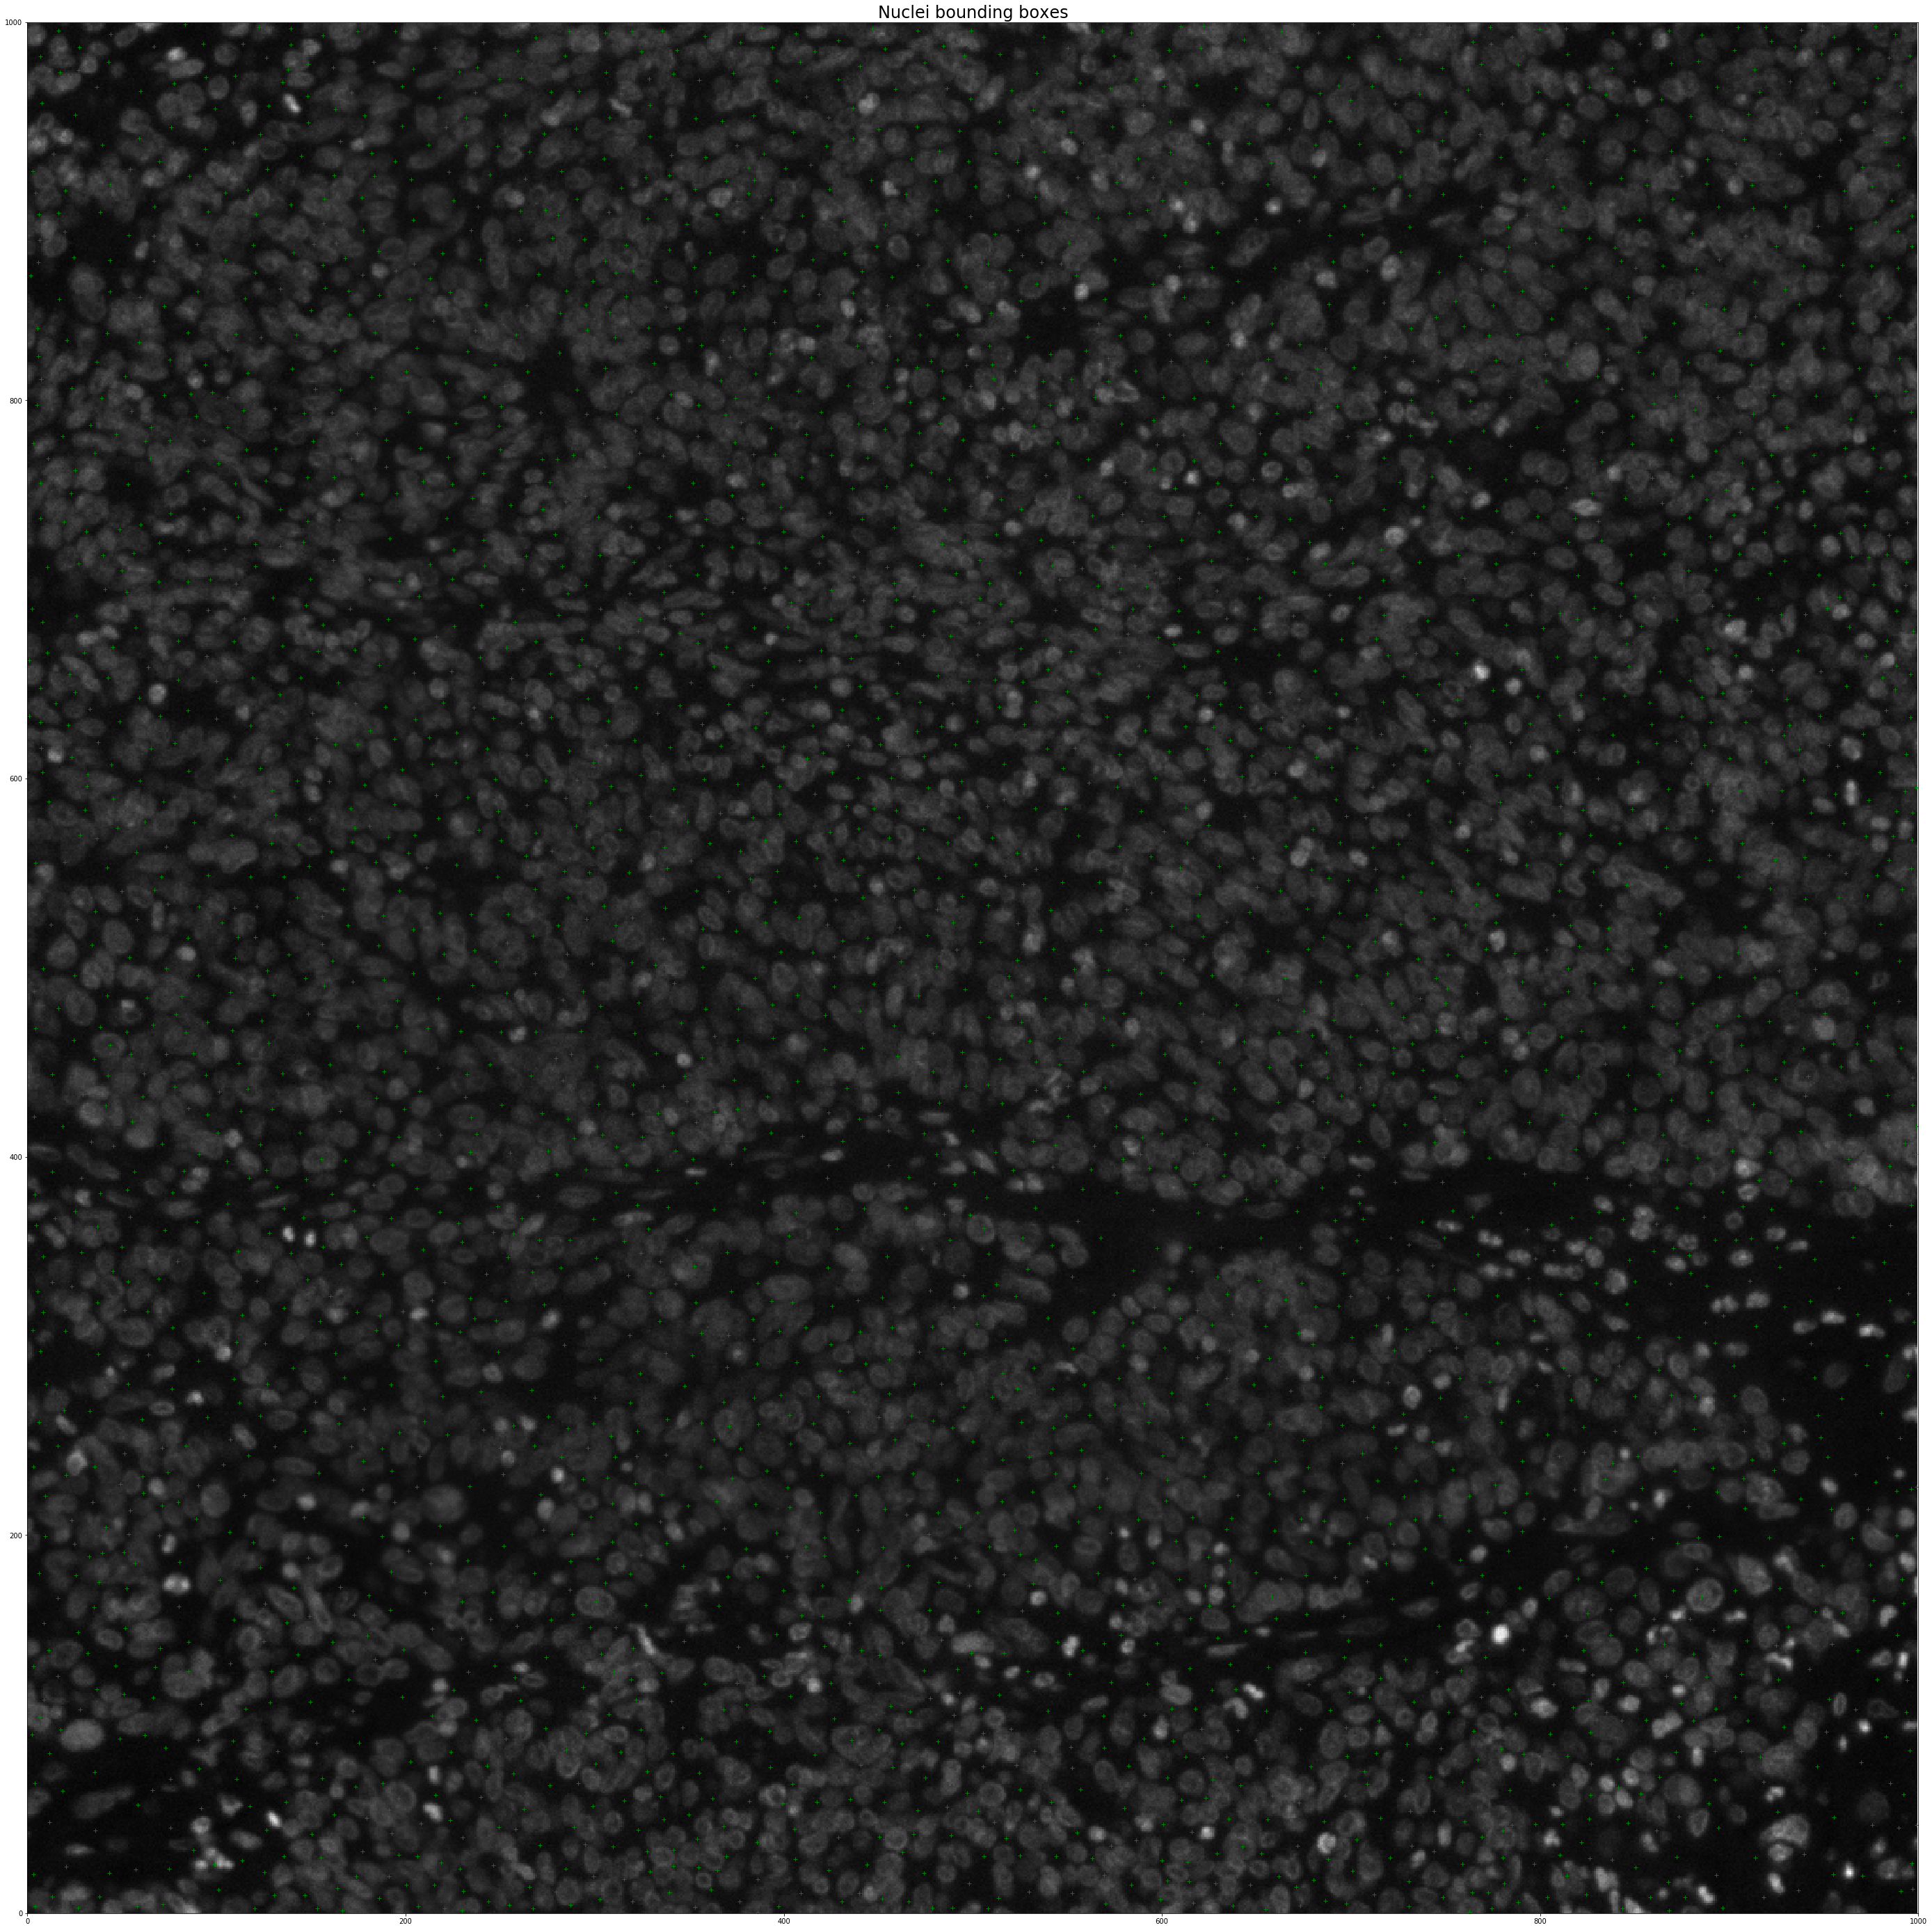

In [17]:
print 'Number of nuclei = ', len(objProps)

# Display results
plt.figure(figsize=(50, 50))

# plt.subplot(1, 2, 1)
# plt.imshow(skimage.color.label2rgb(im_nuclei_seg_mask, im_nuclei_stain, bg_label=0), origin='lower')
# plt.title('Nuclei segmentation mask overlay', fontsize=titlesize)

# plt.subplot(1, 2, 2)
plt.imshow( normalizedImg )
plt.xlim([0, normalizedImg.shape[1]])
plt.ylim([0, normalizedImg.shape[0]])
plt.title('Nuclei bounding boxes', fontsize=titlesize)

for i in range(len(objProps)):

    c = [objProps[i].centroid[1], objProps[i].centroid[0], 0]
    width = objProps[i].bbox[3] - objProps[i].bbox[1] + 1
    height = objProps[i].bbox[2] - objProps[i].bbox[0] + 1

    cur_bbox = {
        "type":        "rectangle",
        "center":      c,
        "width":       width,
        "height":      height,
    }

    plt.plot(c[0], c[1], 'g+')
#     mrect = mpatches.Rectangle([c[0] - 0.5 * width, c[1] - 0.5 * height] ,
#                                width, height, fill=False, ec='g', linewidth=2)
#     plt.gca().add_patch(mrect)

In [43]:
# collect the centroid
X = [(objProps[i].centroid[0], objProps[i].centroid[1]) for i in range(len(objProps))]

X[:3]

[(1.7142857142857142, 343.65714285714284),
 (3.375, 517.675),
 (1.4375, 652.15625)]